In [138]:
import numpy as np
import pandas as pd
import regex as re

from functools import partial
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier


from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn import preprocessing
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

from collections import Counter
from imblearn.over_sampling import RandomOverSampler 
from sklearn.pipeline import make_pipeline

import scipy.stats as stats
from numpy import percentile
from statistics import mean


import pickle
import datetime
import time
from datetime import datetime
from datetime import date

import imblearn
from imblearn.over_sampling import SMOTE

In [139]:
from ftplib import FTP
import ftplib
import os
import socket
import sys

In [142]:
HOSTNAME= "hamiddleware.centralindia.cloudapp.azure.com"
USERNAME = "newftpuser"
PASSWORD = "^&XW8ARccie76"

try:
    ftp = FTP(HOSTNAME)
except(socket.error,socket.gaierror):
    print('cannot reach to %s' % HOSTNAME)
    print("Connect to ftp server")

ftp.encoding = "utf-8"

ftp.login(USERNAME,PASSWORD)

try:
        ftp.login(USERNAME,PASSWORD)
        print ("logged on to the ftp server")
except ftplib.error_perm:
        print('cannot login anonymously')
        ftp.quit()
        print ("logged on to the ftp server")
    
ftp.login(USERNAME,PASSWORD)

try:
        ftp.cwd("/home/newftpuser/ftp/upload/retail_pov")
        print("'250 Directory successfully changed.'")
except ftplib.error_perm:
        print('550 Failed to change directory')
#         ftp.quit()
        print ("Please try again")

filematch = '*.csv'

files = []

try:
    files = ftp.nlst(filematch)
except ftp.error_perm as resp:
    if str(resp) == "550 No files found":
        print("No files in this directory")
    else:
        raise
data = []
for f in files:
    print(f)
    data.append(f)

files = ["retail-pov-store-data_17-03-2022 17:00.csv","localevents_17-03-2022 17:00.csv",
            "publicholidays_17-03-2022 17:00.csv","weather_17-03-2022 17:00.csv"]

# import time
# import datetime
# today_format = datetime.datetime.today().strftime('%d-%m-%Y')
# print (today_format)
# # exp_date = str(today_format + datetime.timedelta(days=365)).split(" ")
# # exp = exp_date[0]
# # print (exp)
# # print(today_format.date())
# time = "17:00"

# new_filenames = []
# updated_file_name = []
# for filename in files:
#     filename = filename.split("_")
#     new_filenames.append(filename)
# #     print(filename)
#     for filename in new_filenames:
#         filename = filename[0] + "_" + str(today_format) + " " + time
#         updated_file_name.append(filename)
#     print(filename)
        
retail_pov_files = []
try:
    for filename in files:
        with open(filename, "wb") as file:
# 	# Command for Downloading the file "RETR filename"
            ftp.retrbinary(f"RETR {filename}", file.write)
        print("File succesfully downloaded")
        retail_pov_files.append(filename)
    print(retail_pov_files)
except ftplib.error_perm:
        print('550 Failed to open the file')
#         ftp.quit()
        print ("Please try again")

# with open(filename, "wb") as file:
# # 	# Command for Downloading the file "RETR filename"
#     ftp.retrbinary(f"RETR {filename}", file.write)


ftp.quit()



logged on to the ftp server
'250 Directory successfully changed.'
MasterControllerPrice_01-03-2022 13:56.csv
MasterControllerPrice_02-03-2022 13:58.csv
MasterControllerPrice_03-03-2022 14:00.csv
MasterControllerPrice_04-03-2022 16:02.csv
MasterControllerPrice_05-03-2022 17:04.csv
MasterControllerPrice_06-03-2022 17:06.csv
MasterControllerPrice_25-02-2022 12:18.csv
MasterControllerPrice_25-02-2022 12:49.csv
MasterControllerPrice_26-02-2022 13:50.csv
MasterControllerPrice_27-02-2022 13:52.csv
MasterControllerPrice_28-02-2022 13:54.csv
localevents_06-03-2022 22:30.csv
localevents_07-03-2022 22:30.csv
localevents_08-03-2022 17:00.csv
localevents_09-03-2022 17:00.csv
localevents_10-03-2022 17:00.csv
localevents_11-03-2022 17:00.csv
localevents_12-03-2022 17:00.csv
localevents_13-03-2022 17:00.csv
localevents_14-03-2022 17:00.csv
localevents_15-03-2022 17:00.csv
localevents_16-03-2022 17:00.csv
localevents_17-03-2022 17:00.csv
localevents_24-02-2022 11:23.csv
publicholidays_06-03-2022 22:30.

'221 Goodbye.'

In [4]:
# ftp.cwd("/home/newftpuser/ftp/upload/retail_pov")


## User Defined Functions

In [5]:
def find_date_diff(date_1, date_2):
    order_dd = int(date_1.split("-")[0])
    order_mm = int(date_1.split("-")[1])
    
    holiday_dd = int(date_2.split("-")[0])
    holiday_mm = int(date_2.split("-")[1])
    
    days = (date(2022,holiday_mm,holiday_dd) - date(2022,order_mm,order_dd)).days
    if days <= 0:
        return 0
    else:
        return days

## Data Loading and Preprocessing

In [6]:
# ["retail-pov-store-data_07-03-2022 22:30.csv","localevents_07-03-2022 22:30.csv",
#             "publicholidays_07-03-2022 22:30.csv","weather_07-03-2022 22:30.csv"]

In [143]:
retail_df = pd.read_csv(retail_pov_files[0])
retail_df.head()

Product Code                         Product Name  \
0  1e9e8ef04dbcff4541ed26657ea517e5  MLB Cincinnati Reds T Shirt Size XL   
1  3aa071139cb16b67ca9e5dea641aaa2f     Razer BlackWidow Chroma Keyboard   
2  96bd76ec8810374ed1b65e291975717f                       AVA-VIV Blouse   
3  cef67bcfe19066a932b7673e239eb23d                Leather Horse Statues   
4  9dc1a7de274444849c219cff195d0b71                 24K GOLD plated rose   

                                    Product Category Product Brand  \
0                                  Men/Tops/T-shirts           NaN   
1  Electronics/Computers & Tablets/Components & P...         Razer   
2                        Women/Tops & Blouses/Blouse        Target   
3               Home/Home DÃ©cor/Home DÃ©cor Accents           NaN   
4                            Women/Jewelry/Necklaces           NaN   

   Base Price  Current Selling Price  Predicted Price  Current Profit Margin  \
0     48.5485                  74.69        71.030190                26.1415   
1     11.4600                  15.28        15.241800                 3.8200   
2     30.1145                  46.33        48.600170                16.2155   
3     34.9320                  58.22        56.822720                23.2880   
4     56.1015                  86.31        90.237105                30.2085   

   Predicted Profit Margin  Sold Quantity     Tax  Total Sales  \
0                22.481690              7  3.7345     548.9715   
1                 3.781800              5  0.7640      80.2200   
2                18.485670              7  2.3165     340.5255   
3                21.890720              8  2.9110     489.0480   
4                34.135605              7  4.3155     634.3785   

                                 Product Description  Quantity In Stock  \
0                                 No description yet                  8   
1  This keyboard is in great condition and works ...                  8   
2  Adorable top with a hint of lace and a key hol...                  5   
3  New with tags. Leather horses. Retail for [rm]...                 10   
4          Complete with certificate of authenticity                  9   

   NoOf Days Left For Holidays                      Order Number  \
0                          279  00010242fe8c5a6d1ba2dd792cb16214   
1                          203  00018f77f2f0320c557190d7a144bdd3   
2                           66  000229ec398224ef6ca0657da4fc703e   
3                          224  00024acbcdf0a6daa1e931b038114c75   
4                           37  00042b26cf59d7ce69dfabb4e55b4fd9   

         Order Date  
0  02-10-2017 10:10  
1  24-07-2018 08:07  
2  08-08-2018 08:08  
3  18-11-2017 07:11  
4  13-02-2018 09:02

In [8]:
retail_df.columns

Index(['Product Code', 'Product Name', 'Product Category', 'Product Brand',
       'Base Price', 'Current Selling Price', 'Predicted Price',
       'Current Profit Margin', 'Predicted Profit Margin', 'Sold Quantity',
       'Tax', 'Total Sales', 'Product Description', 'Quantity In Stock',
       'NoOf Days Left For Holidays', 'Order Number', 'Order Date'],
      dtype='object')

In [9]:
product_category = retail_df["Product Category"].unique()

In [10]:
Product_Categories_csv = pd.DataFrame()
Product_Categories_csv["Product_Name"] = retail_df["Product Name"]
Product_Categories_csv["Product_Category"] = retail_df["Product Category"]
Product_Categories_csv["Brand_name"] = retail_df["Product Brand"].to_list()
Product_Categories_csv["Product_Description"] = retail_df["Product Description"].to_list()
Product_Categories_csv.to_csv("Product_Categories_csv.csv")

In [11]:
retail_df.shape

(4387, 17)

In [12]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4387 entries, 0 to 4386
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Product Code                 4387 non-null   object 
 1   Product Name                 4387 non-null   object 
 2   Product Category             4368 non-null   object 
 3   Product Brand                2513 non-null   object 
 4   Base Price                   4387 non-null   float64
 5   Current Selling Price        4387 non-null   float64
 6   Predicted Price              4387 non-null   float64
 7   Current Profit Margin        4387 non-null   float64
 8   Predicted Profit Margin      4387 non-null   float64
 9   Sold Quantity                4387 non-null   int64  
 10  Tax                          4387 non-null   float64
 11  Total Sales                  4387 non-null   float64
 12  Product Description          4387 non-null   object 
 13  Quantity In Stock 

## Predicting Demand

In [13]:
training_cols = ["Product Code", "Base Price", "Current Selling Price", "Predicted Price", 
                 "Current Profit Margin","Predicted Profit Margin","Sold Quantity"]

In [14]:
training_data = retail_df[training_cols]
# training_data.rename(columns = {"discounted_price":"predcited_price", "discounted_margin":"predicted_margin"}, inplace = True)
training_data.head(2)

Product Code  Base Price  Current Selling Price  \
0  1e9e8ef04dbcff4541ed26657ea517e5     48.5485                  74.69   
1  3aa071139cb16b67ca9e5dea641aaa2f     11.4600                  15.28   

   Predicted Price  Current Profit Margin  Predicted Profit Margin  \
0         71.03019                26.1415                 22.48169   
1         15.24180                 3.8200                  3.78180   

   Sold Quantity  
0              7  
1              5

In [15]:
demand_df = pd.DataFrame()
demand_df["product_id"] = training_data["Product Code"]
demand_df["base_price$"] = training_data["Base Price"]
demand_df["current_selling_price$"] = training_data["Current Selling Price"]
demand_df["current_profit_margin$"] = training_data["Current Profit Margin"]
demand_df["Units_Sold"] = training_data["Sold Quantity"]
demand_df["predicted_price$"] = training_data["Predicted Price"]

In [16]:
demand_df.to_csv("demand_df.csv")

                        base_price$  current_selling_price$  \
base_price$                1.000000                0.921598   
current_selling_price$     0.921598                1.000000   
current_profit_margin$     0.249539                0.605841   
Units_Sold                 0.110568                0.167573   
predicted_price$           0.906108                0.993128   

                        current_profit_margin$  Units_Sold  predicted_price$  
base_price$                           0.249539    0.110568          0.906108  
current_selling_price$                0.605841    0.167573          0.993128  
current_profit_margin$                1.000000    0.191437          0.620448  
Units_Sold                            0.191437    1.000000          0.167979  
predicted_price$                      0.620448    0.167979          1.000000  


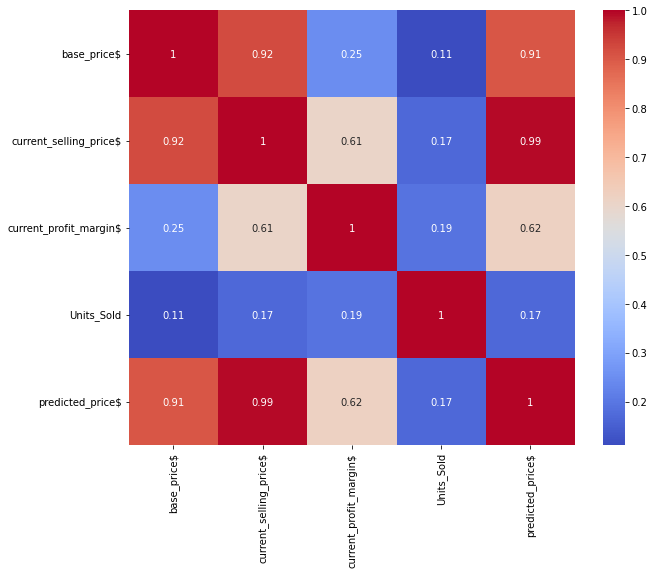

In [17]:
print(demand_df.corr())
correlations = demand_df.corr(method='pearson')
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, cmap="coolwarm", annot=True)
plt.show()

In [18]:
x = demand_df.drop(["predicted_price$","product_id"], axis =1)
y = demand_df["predicted_price$"]


xtrain, xtest, ytrain, ytest = train_test_split(x, y,test_size=0.2,random_state=42)
orderhistory_model = DecisionTreeRegressor()
orderhistory_model.fit(xtrain, ytrain)

DecisionTreeRegressor()

In [19]:
coefficient_of_dermination = r2_score(ytest,orderhistory_model.predict(xtest))
coefficient_of_dermination

0.974164946129792

In [20]:
xtest.head()

base_price$  current_selling_price$  current_profit_margin$  Units_Sold
2776    50.551278               75.449669               24.898391          13
3023    38.340539               61.839579               23.499040           6
2606   100.960885              120.191530               19.230645          15
912     69.989230               98.576380               28.587150           3
877     48.919948               67.944372               19.024424          15

In [21]:
for i in zip(ytest,orderhistory_model.predict(xtest)):
    print(i)

(73.20881385, 76.70383225)
(67.47934817, 58.8859449)
(124.2299652, 128.1178529)
(101.4350954, 99.88483869)
(69.4663257, 70.2750546)
(84.45275, 78.20485976)
(50.9266241, 51.932775)
(99.10800707, 98.59967027)
(104.7532518, 107.750975)
(120.2204604, 121.7698905)
(57.91968, 62.21482744)
(100.0663213, 98.56369455)
(102.8669877, 99.81144686)
(67.37505475, 67.34516845)
(70.7366, 74.87206742)
(71.60377071, 73.89422217)
(34.56128, 35.27285)
(79.22924569, 74.68419441)
(114.7682778, 114.6256795)
(119.9090263, 121.8134982)
(67.56122782, 65.08176)
(87.61735299, 85.61127512)
(69.33017721, 63.51301727)
(123.5268917, 121.8268629)
(116.1100742, 121.037257)
(97.58771972, 96.56131959)
(124.5410589, 130.5957651)
(82.88706036, 82.18347652)
(73.7816497, 70.79450944)
(95.52345, 95.85624007)
(88.67360508, 87.61031883)
(48.43224, 52.71461463)
(118.2168519, 101.999641)
(60.04555254, 60.60555041)
(77.59856682, 81.01801399)
(79.98012826, 84.06902801)
(81.2561, 75.48201047)
(94.14389233, 94.85630481)
(92.1842386, 

In [22]:
demand_df.columns

Index(['product_id', 'base_price$', 'current_selling_price$',
       'current_profit_margin$', 'Units_Sold', 'predicted_price$'],
      dtype='object')

In [23]:
pickle.dump(orderhistory_model, open('orderhistory_model.pkl','wb'))

## Based Holiday/Events

In [24]:
retail_holiday_data = pd.read_csv(retail_pov_files[2])
retail_holiday_data.head()

Name Date Of Holiday
0    New Year's Day      31-12-2021
1  Independence Day      04-07-2022
2         Labor Day      05-09-2022
3      Columbus Day      10-10-2022
4         Halloween      31-10-2022

In [25]:
retail_events = pd.read_csv(retail_pov_files[1],on_bad_lines='skip')
retail_events.head()

Event Id       Event Type        Event Name      State    Location  \
0         0   New Year's Day               NaN         US   Las Vegas   
1        10     Thanksgiving               NaN         US    New York   
2        11   New Year's Eve               NaN         US  Harrisburg   
3        12  Valentine's Day               NaN         US    New York   
4        13  MAGIC LAS VEGAS  Apparel #Fashion  Las Vegas          US   

   Start Date    End Date  
0  2022-01-01  2022-01-01  
1  2022-11-24  2022-11-24  
2  2022-12-31  2022-12-31  
3  2022-02-14  2022-02-14  
4  2022-02-16  2022-02-16

In [26]:
demand_df.columns

Index(['product_id', 'base_price$', 'current_selling_price$',
       'current_profit_margin$', 'Units_Sold', 'predicted_price$'],
      dtype='object')

In [27]:
Holiday_1_df = pd.DataFrame()
Holiday_1_df["product_id"] = demand_df["product_id"]
Holiday_1_df["base_price"] = demand_df["base_price$"]
Holiday_1_df["current_selling_price"] = demand_df["current_selling_price$"]
Holiday_1_df["predicted_price"] = demand_df["predicted_price$"]
Holiday_1_df["current_profit_margin"] = demand_df["current_profit_margin$"]
Holiday_1_df["Units_Sold"] = demand_df["Units_Sold"]
Holiday_1_df["Num_Holiday"] = retail_df["NoOf Days Left For Holidays"]

# le = preprocessing.LabelEncoder()
# le.fit(Holiday_1_df["product_id"])
# Holiday_1_df.loc[:,"product_id"] = le.transform(Holiday_1_df.loc[:,"product_id"])


In [28]:
Holiday_1_df.to_csv("Holiday_1_df.csv")

                        base_price$  current_selling_price$  \
base_price$                1.000000                0.921598   
current_selling_price$     0.921598                1.000000   
current_profit_margin$     0.249539                0.605841   
Units_Sold                 0.110568                0.167573   
predicted_price$           0.906108                0.993128   

                        current_profit_margin$  Units_Sold  predicted_price$  
base_price$                           0.249539    0.110568          0.906108  
current_selling_price$                0.605841    0.167573          0.993128  
current_profit_margin$                1.000000    0.191437          0.620448  
Units_Sold                            0.191437    1.000000          0.167979  
predicted_price$                      0.620448    0.167979          1.000000  


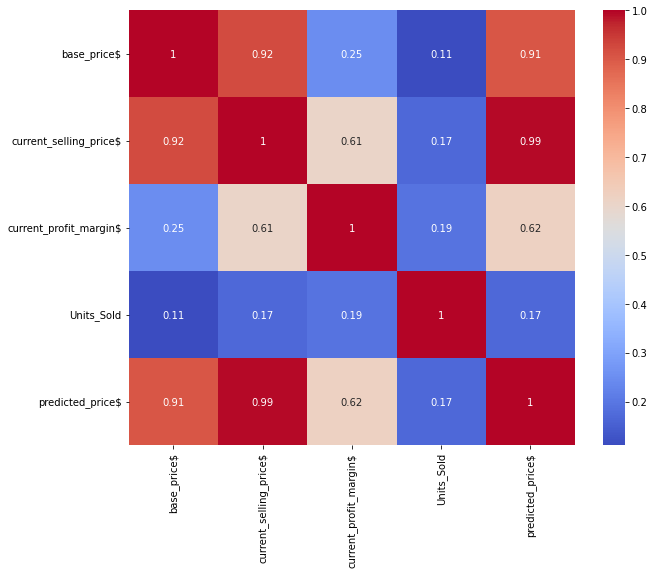

In [29]:
print(demand_df.corr())
correlations = demand_df.corr(method='pearson')
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, cmap="coolwarm", annot=True)
plt.show()

In [30]:
x = Holiday_1_df.drop(["predicted_price","product_id"], axis =1)
y = Holiday_1_df["predicted_price"]


xtrain, xtest, ytrain, ytest = train_test_split(x, y,test_size=0.2,random_state=42)
holiday_model = DecisionTreeRegressor()
holiday_model.fit(xtrain, ytrain)

DecisionTreeRegressor()

In [31]:
coefficient_of_dermination = r2_score(ytest,holiday_model.predict(xtest))
coefficient_of_dermination

0.9740429539931723

In [32]:
pickle.dump(holiday_model, open('holiday_model.pkl','wb'))

In [33]:
for i in zip(ytest,holiday_model.predict(xtest)):
    print(i)

(73.20881385, 74.61221261)
(67.47934817, 65.83692032)
(124.2299652, 128.1178529)
(101.4350954, 96.20639969)
(69.4663257, 65.43376738)
(84.45275, 79.94727638)
(50.9266241, 51.932775)
(99.10800707, 103.6382389)
(104.7532518, 105.647365)
(120.2204604, 118.898727)
(57.91968, 62.65222)
(100.0663213, 99.84551419)
(102.8669877, 96.5096)
(67.37505475, 67.34516845)
(70.7366, 72.310312)
(71.60377071, 73.89422217)
(34.56128, 36.72)
(79.22924569, 72.39314619)
(114.7682778, 110.981937)
(119.9090263, 120.4746563)
(67.56122782, 65.08176)
(87.61735299, 89.41144191)
(69.33017721, 70.51649718)
(123.5268917, 121.1876714)
(116.1100742, 122.1689836)
(97.58771972, 96.56131959)
(124.5410589, 130.5957651)
(82.88706036, 80.86631892)
(73.7816497, 70.79450944)
(95.52345, 91.41102876)
(88.67360508, 100.5469518)
(48.43224, 51.77811345)
(118.2168519, 104.6509857)
(60.04555254, 60.60555041)
(77.59856682, 78.96858463)
(79.98012826, 82.18347652)
(81.2561, 80.18815839)
(94.14389233, 93.39389217)
(92.1842386, 88.4468766

In [34]:
# def getIndexes(dfObj, value):
#     # ''' Get index positions of value in dataframe i.e. dfObj.'''
#         listOfPos = list()
#     # Get bool dataframe with True at positions where the given value exists
#         result = dfObj.isin([value])
#     # Get list of columns that contains the value
# #         seriesObj = result.any()
#         columnNames = list(seriesObj[seriesObj == True].index)
#     # Iterate over list of columns and fetch the rows indexes where value exists
#         for col in columnNames:
#             rows = list(result[col][result[col] == True].index)
#             for row in rows:
#                 listOfPos.append((row))
#     # Return a list of tuples indicating the positions of value in the dataframe
#         return listOfPos

In [35]:
# description = "Valentine's Day"

In [36]:
# index_events = getIndexes(retail_events, description)
# print(index_events)
# event_date = list(retail_events["Start Date"].iloc[index_events])
# print(event_date)
# event_date = pd.to_datetime(event_date[0])
# print(event_date)
# event_date = datetime.datetime.strptime(str(event_date.date()),"%Y-%m-%d").strftime("%d-%m-%Y")        
# print(event_date)

In [37]:
# input_date = "2022-02-14"

In [38]:
# input_date = pd.to_datetime(input_date)
# print(input_date)
# input_date = datetime.datetime.strptime(str(input_date.date()),"%Y-%m-%d").strftime("%d-%m-%Y")
# print(input_date)

In [39]:
# result = holiday_df.isin(["Martin Luther King Jr. Day"])
# seriesObj = result.any()
# seriesObj
# columnNames = list(seriesObj[seriesObj == True].index)
# columnNames
# for col in columnNames:
#             rows = list(result[col][result[col] == True].index)
        
# rows

In [40]:
# holiday_date = list(holiday_df["holiday_date"].iloc[rows])
# holiday_date[0]

In [41]:
# date1 = "17-01-2022"
# date2 = "11-02-2022"

In [42]:
# order_dd = int(date1.split("-")[0])
# order_mm = int(date1.split("-")[1])
    
# holiday_dd = int(date2.split("-")[0])
# holiday_mm = int(date2.split("-")[1])

# print(order_dd,order_mm,holiday_dd,holiday_mm)

In [43]:
# days = (date(2022,1,17) - date(2022,2,11)).days
# if days <= 0:
#     return 0
# else:
#     return days

## LocalweatherPricePrediction

In [44]:
Y = 2022 # dummy leap year to allow input X-02-29 (leap day)
seasons = [('winter', (date(Y,  1,  1),  date(Y,  3, 20))),
           ('spring', (date(Y,  3, 21),  date(Y,  6, 20))),
           ('summer', (date(Y,  6, 21),  date(Y,  9, 22))),
           ('autumn', (date(Y,  9, 23),  date(Y, 12, 20))),
           ('winter', (date(Y, 12, 21),  date(Y, 12, 31)))]
 
def get_season(now):
    if isinstance(now, datetime):
        now = now.date()
        print(now)
    now = now.replace(year=Y)
#     print(now)
    return next(season for season, (start, end) in seasons
                if start <= now <= end)
 
# (get_season(date(order_year,order_mm,order_dd)))

In [45]:
date1 = "17-01-2022"
date2 = "11-02-2022"
order_dd = int(date1.split("-")[0])
order_mm = int(date1.split("-")[1])

In [46]:
get_season(date(2020,2,15))

'winter'

In [47]:
def d_m_y():
    season = get_season(date(2020,2,15))
    return season
print(d_m_y())
    

winter


In [48]:
type(d_m_y())

str

In [49]:
date.today()

datetime.date(2022, 3, 17)

In [50]:
localweatherdata = pd.DataFrame({})

In [51]:
def d_m_y(x):
    order_date = x.split(" ")
    order_dd = int(order_date[0].split("-")[0])
    order_mm = int(order_date[0].split("-")[1])
    order_year = int(order_date[0].split("-")[2])

    season = get_season(date(order_year,order_mm,order_dd))
    return season

In [52]:
d_m_y("02-10-2017 10:10")

'autumn'

In [53]:
localweatherdata["season"] = retail_df["Order Date"].apply(d_m_y)
localweatherdata["season"].head(5)

0    autumn
1    summer
2    summer
3    autumn
4    winter
Name: season, dtype: object

In [54]:
# localweatherdata["season"].value_counts().to_dict()

In [55]:
localweatherdata["product_id"] = demand_df["product_id"]
localweatherdata["base_price"] = demand_df["base_price$"]
localweatherdata["current_selling_price"] = demand_df["current_selling_price$"]
localweatherdata["predicted_price"] = demand_df["predicted_price$"]
localweatherdata["current_profit_margin"] = demand_df["current_profit_margin$"]
localweatherdata["Units_Sold"] = demand_df["Units_Sold"]

In [56]:
le=preprocessing.LabelEncoder()
le.fit(localweatherdata["season"]) #fit_tranform, fit and then transform

LabelEncoder()

In [57]:
# localweatherdata["season"].replace({'spring': 0, 'summer': 1, 'winter': 2, 'autumn': 3},inplace=True)
localweatherdata["season_transformed"] = le.transform(localweatherdata["season"])

In [58]:
localweatherdata["season_transformed"].head()

0    0
1    2
2    2
3    0
4    3
Name: season_transformed, dtype: int32

In [59]:
# localweatherdata.loc[:,"season"] = le.transform(localweatherdata.loc[:,"season"])

In [60]:
f = open('le.obj', 'wb')
pickle.dump(le,f)
f.close()

In [61]:
localweatherdata.to_csv("localweatherdata.csv")

                        base_price$  current_selling_price$  \
base_price$                1.000000                0.921598   
current_selling_price$     0.921598                1.000000   
current_profit_margin$     0.249539                0.605841   
Units_Sold                 0.110568                0.167573   
predicted_price$           0.906108                0.993128   

                        current_profit_margin$  Units_Sold  predicted_price$  
base_price$                           0.249539    0.110568          0.906108  
current_selling_price$                0.605841    0.167573          0.993128  
current_profit_margin$                1.000000    0.191437          0.620448  
Units_Sold                            0.191437    1.000000          0.167979  
predicted_price$                      0.620448    0.167979          1.000000  


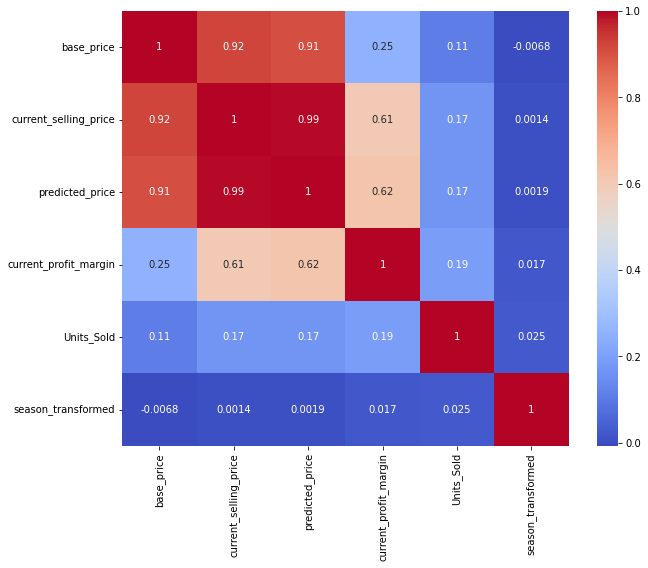

In [62]:
print(demand_df.corr())
correlations = localweatherdata.corr(method='pearson')
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, cmap="coolwarm", annot=True)
plt.show()

In [63]:
x = localweatherdata.drop(["predicted_price","product_id","season"], axis =1)
y = localweatherdata["predicted_price"]


xtrain, xtest, ytrain, ytest = train_test_split(x, y,test_size=0.2,random_state=42)
localweather_model = DecisionTreeRegressor()
localweather_model.fit(xtrain, ytrain)

DecisionTreeRegressor()

In [64]:
xtest.head()

base_price  current_selling_price  current_profit_margin  Units_Sold  \
2776   50.551278              75.449669              24.898391          13   
3023   38.340539              61.839579              23.499040           6   
2606  100.960885             120.191530              19.230645          15   
912    69.989230              98.576380              28.587150           3   
877    48.919948              67.944372              19.024424          15   

      season_transformed  
2776                   1  
3023                   3  
2606                   2  
912                    2  
877                    1

In [65]:
coefficient_of_dermination = r2_score(ytest,localweather_model.predict(xtest))
coefficient_of_dermination

0.9736235379591437

In [66]:
pickle.dump(localweather_model, open('localweather_model.pkl','wb'))

In [67]:
for i in list(zip(localweatherdata["base_price"],localweatherdata["current_selling_price"],localweather_model.predict(x))):
    print(i)
# Current Selling Price$":74.69,"Predicted Price$":26.57
# Current Selling Price$":15.28,"Predicted Price$":11.02,
# Current Selling Price$":46.33,"Predicted Price$":16.04

(48.5485, 74.69, 71.03019)
(11.46, 15.28, 15.2418)
(30.1145, 46.33, 48.60017)
(34.932, 58.22, 56.82272)
(56.1015, 86.31, 90.237105)
(55.5035, 85.39, 84.79227)
(48.188, 68.84, 68.84)
(36.78, 73.56, 79.4448)
(32.634, 36.26, 35.88732)
(46.614, 54.84, 55.33356)
(11.584, 14.48, 14.3352)
(20.408, 25.51, 26.2753)
(35.2125, 46.95, 49.06275)
(21.595, 43.19, 42.54215)
(65.604, 93.72, 91.76793714)
(44.8045, 68.93, 72.548825)
(50.827, 72.61, 74.7883)
(46.4695, 54.67, 56.6756328)
(36.27, 40.3, 39.9373)
(64.53, 86.04, 90.1269)
(74.783, 87.98, 89.69561)
(29.88, 33.2, 32.868)
(25.92, 34.56, 36.72)
(75.3355, 88.63, 98.39827083)
(31.554, 52.59, 54.27288)
(31.844, 33.52, 33.7714)
(78.903, 87.67, 89.20156075)
(66.27, 88.36, 88.5809)
(13.6895, 24.89, 28.02614)
(70.5975, 94.13, 94.72607701)
(42.9385, 78.07, 79.6926)
(50.268, 83.78, 80.4288)
(64.714, 68.12, 66.56427619)
(46.965, 62.62, 64.11661861)
(33.484, 60.88, 64.44148)
(32.952, 54.92, 59.75296)
(18.072, 30.12, 29.5176)
(82.384, 86.72, 87.50048)
(50.499,

(69.54743956, 84.81395068, 86.18793668)
(55.92598778, 83.47162355, 88.15438163)
(53.48108105, 76.40154436, 81.21484166)
(62.40765868, 75.18995021, 73.65607523)
(89.11314453, 114.2476212, 111.9855183)
(85.95947116, 122.7992445, 121.7698905)
(48.73771094, 60.1700135, 60.05569047)
(76.9554144, 95.00668444, 96.45078604)
(49.78449546, 77.78827415, 84.78921882)
(73.44455876, 103.4430405, 101.3431468)
(66.06832799, 103.2317625, 100.6377025)
(85.82757563, 97.53133594, 98.35059916)
(76.0997521, 92.80457573, 90.29885219)
(88.60383485, 104.2398057, 104.083446)
(87.75345403, 118.5857487, 120.7293525)
(101.6880803, 119.6330356, 123.5809258)
(97.79324248, 119.2600518, 123.9167455)
(67.61326812, 78.62007921, 79.06035165)
(104.7638045, 123.2515347, 128.2432219)
(61.40312615, 97.46527961, 99.86158624)
(82.72725208, 106.0605796, 110.7272451)
(41.86704444, 69.77840741, 65.59170296)
(77.88526369, 101.1496931, 99.98647163)
(73.0134042, 105.8165278, 101.5521217)
(40.21378565, 55.0873776, 53.74875432)
(73.47

In [68]:
def date_format(x):
    date = pd.to_datetime(x)
    return date

# Merged prediction

In [69]:
merged_csv = pd.read_csv("merged_csv.csv")
merged_csv.head()

Unnamed: 0                        product_id  base_price$  \
0           0  1e9e8ef04dbcff4541ed26657ea517e5      48.5485   
1           1  3aa071139cb16b67ca9e5dea641aaa2f      11.4600   
2           2  96bd76ec8810374ed1b65e291975717f      30.1145   
3           3  cef67bcfe19066a932b7673e239eb23d      34.9320   
4           4  9dc1a7de274444849c219cff195d0b71      56.1015   

   current_selling_price$  current_profit_margin$  Units_Sold  \
0                   74.69                 26.1415           7   
1                   15.28                  3.8200           5   
2                   46.33                 16.2155           7   
3                   58.22                 23.2880           8   
4                   86.31                 30.2085           7   

   predicted_price$  NumofdaysHoliday  Numofdaysevents  weather  
0         71.030190               279              162       15  
1         15.241800               203              152        7  
2         48.600170                66               39       10  
3         56.822720               224              219       17  
4         90.237105                37              155        8

                        base_price$  current_selling_price$  \
base_price$                1.000000                0.921598   
current_selling_price$     0.921598                1.000000   
current_profit_margin$     0.249539                0.605841   
Units_Sold                 0.110568                0.167573   
predicted_price$           0.906108                0.993128   

                        current_profit_margin$  Units_Sold  predicted_price$  
base_price$                           0.249539    0.110568          0.906108  
current_selling_price$                0.605841    0.167573          0.993128  
current_profit_margin$                1.000000    0.191437          0.620448  
Units_Sold                            0.191437    1.000000          0.167979  
predicted_price$                      0.620448    0.167979          1.000000  


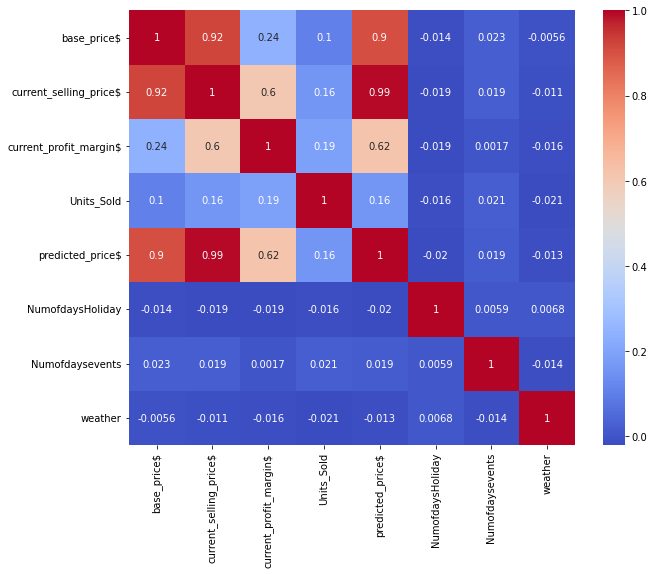

In [70]:
merged_csv.drop(["Unnamed: 0"],axis=1,inplace=True)
# merged_le=preprocessing.LabelEncoder()
# merged_le.fit(merged_csv["season"])
# merged_csv["season"] = merged_le.transform(merged_csv["season"])
# f = open('merged_le.obj', 'wb')
# pickle.dump(merged_le,f)
# f.close()
print(demand_df.corr())
correlations = merged_csv.corr(method='pearson')
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, cmap="coolwarm", annot=True)
plt.show()

In [71]:
x = merged_csv.drop(["predicted_price$","product_id"], axis =1)
y = merged_csv["predicted_price$"]

xtrainmerged, xtestmerged, ytrainmerged, ytestmerged = train_test_split(x, y,test_size=0.2,random_state=42)
merged_model = DecisionTreeRegressor()
merged_model.fit(xtrainmerged, ytrainmerged)
coefficient_of_dermination = r2_score(ytestmerged,merged_model.predict(xtestmerged))
print(coefficient_of_dermination)
pickle.dump(merged_model, open('merged_model.pkl','wb'))

0.9733164641577858


In [72]:
xtestmerged.head(2)

base_price$  current_selling_price$  current_profit_margin$  Units_Sold  \
84      36.682500               48.910000               12.227500           5   
2470    33.232375               51.126731               17.894356           8   

      NumofdaysHoliday  Numofdaysevents  weather  
84                 146               63        1  
2470                64               16       20

In [73]:
test_df_merged = {"base_price$" :[36.682500],"current_selling_price$":[48.910000],
                               "current_profit_margin$":[12.227500],
                   "Units_Sold":[5],"NumofdaysHoliday":[146],"Numofdaysevents":[],"weather":[1]}

In [74]:
print ("True") if test_df_merged["base_price$"] else print("False")  # prints true
print ("True") if test_df_merged["current_selling_price$"] else print("False")  # prints false
print ("True") if test_df_merged["current_profit_margin$"] else print("False")  # prints true
print ("True") if test_df_merged["Units_Sold"] else print("False")  # prints false
print ("True") if test_df_merged["Numofdaysevents"] else print("False") # prints true
print ("True") if test_df_merged["weather"] else print("False")  # prints false

True
True
True
True
False
True


In [75]:
base_price = [36.682500]
current_selling_price = [48.910000]
current_profit_margin = [12.227500]
Units_Sold = [5]
NumofdaysHoliday = []
Numofdaysevents = []
weather = [1]

In [76]:
if base_price:
    base_price = base_price
else:
    base_price = [-1]
if NumofdaysHoliday:
    NumofdaysHoliday = NumofdaysHoliday
else:
    NumofdaysHoliday = [-1]
if Numofdaysevents:
    Numofdaysevents = Numofdaysevents
else:
    Numofdaysevents = [-1]

In [77]:
test_df_merged = pd.DataFrame({"base_price$" :base_price,"current_selling_price$":current_selling_price,
                               "current_profit_margin$":current_profit_margin,
                   "Units_Sold":Units_Sold,"NumofdaysHoliday":NumofdaysHoliday,"Numofdaysevents":Numofdaysevents,
                  "weather":weather})

In [78]:
merged_model.predict(test_df_merged)

array([51.56613])

In [79]:
# date1 = 12,2,2022
# date2 = 17,10,2022
# print(datetime.date.strftime(date1, "%m/%d/%Y"))
# print(datetime.date.strftime(date2, "%m/%d/%Y"))

In [80]:
# datetime.now().year

In [81]:
# input_date = "30-08-1993"
# input_date = pd.to_datetime(input_date)
# print(input_date.date())
# input_date = datetime.datetime.strptime(str(input_date.date()),"%Y-%m-%d").strftime("%d-%m-%Y")
# print(input_date)

# LocalWeatherapi data price prediction

In [82]:

import scipy.stats as stats
from numpy import percentile

from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV


import imblearn
from imblearn.over_sampling import SMOTE

from ftplib import FTP
import ftplib
import os
import socket
import sys


In [83]:
local_weather_dataset = pd.read_csv("localweatherdf.csv")
local_weather_dataset.head()

Unnamed: 0             datetime  humidity  pressure  temperature  \
0           0  2012-10-01 12:00:00       NaN       NaN          NaN   
1           1  2012-10-01 13:00:00      88.0    1009.0    61.664000   
2           2  2012-10-01 14:00:00      87.0    1009.0    61.654987   
3           3  2012-10-01 15:00:00      86.0    1009.0    61.629113   
4           4  2012-10-01 16:00:00      85.0    1009.0    61.603238   

   wind_direction  wind_speed       weather  
0             NaN         NaN           NaN  
1           150.0         2.0    light rain  
2           147.0         2.0  sky is clear  
3           141.0         2.0  sky is clear  
4           135.0         2.0  sky is clear

In [84]:
def fah_to_celcius(x):
    celcius = 5/9 * (x-32)
    return celcius

In [85]:
local_weather_dataset["temperature"] = local_weather_dataset["temperature"].apply(fah_to_celcius)

In [86]:
# (H) - Humidity in percentage
# (T) - Temperature in Farenheit
# (WD) - Wind Direction in Degrees
# (WS)- Wind Speed in mph

In [87]:
df = local_weather_dataset.copy()

In [88]:
df.drop(["datetime","weather"],axis=1,inplace=True)

In [89]:
# Handling Outliers

In [90]:
z_scores = stats.zscore(df)
# calculate z-scores of `df`

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_df = df[filtered_entries]

In [91]:
q25, q75 = percentile(df["humidity"], 25), percentile(df["humidity"], 75)
iqr = q75 - q25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))
# calculate the outlier cutoff
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off
# identify outliers
outliers = [x for x in df["humidity"] if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))

Percentiles: 25th=nan, 75th=nan, IQR=nan
Identified outliers: 0


In [92]:
# Filling missing values

In [93]:
df["datetime"] = local_weather_dataset["datetime"]
df["weather"] = local_weather_dataset["weather"]

In [94]:
df.columns

Index(['Unnamed: 0', 'humidity', 'pressure', 'temperature', 'wind_direction',
       'wind_speed', 'datetime', 'weather'],
      dtype='object')

In [95]:
df["humidity"] = df["humidity"].fillna(df["humidity"].median())
df["pressure"] = df["pressure"].fillna(df["pressure"].median())
df["temperature"] = df["temperature"].fillna(df["temperature"].median())
df["wind_direction"] = df["wind_direction"].fillna(df["wind_direction"].median())
df["wind_speed"] = df["wind_speed"].fillna(df["wind_speed"].median())
df["weather"]=df["weather"].fillna(method ='pad')

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45253 entries, 0 to 45252
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      45253 non-null  int64  
 1   humidity        45253 non-null  float64
 2   pressure        45253 non-null  float64
 3   temperature     45253 non-null  float64
 4   wind_direction  45253 non-null  float64
 5   wind_speed      45253 non-null  float64
 6   datetime        45253 non-null  object 
 7   weather         45252 non-null  object 
dtypes: float64(5), int64(1), object(2)
memory usage: 2.8+ MB


In [97]:
df["weather"] = df["weather"].fillna(df["weather"].mode())

In [98]:
# Scaling

In [99]:
numeric_cols = ["humidity","pressure","temperature","wind_direction","wind_speed"]
scaler = MinMaxScaler().fit(df[numeric_cols])
df.loc[:,numeric_cols]=scaler.transform(df.loc[:,numeric_cols])

In [100]:
x = df.loc[:,["temperature","pressure","wind_speed"]]
y = df["weather"]

In [101]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100, stratify=y)

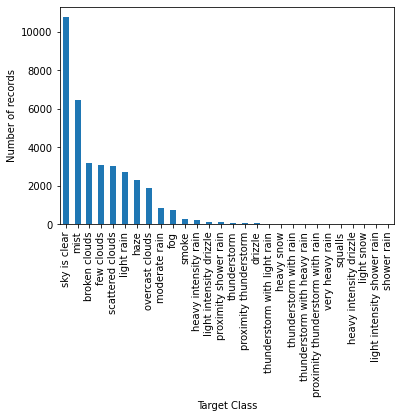

In [102]:
count = y_train.value_counts()
count.plot.bar()
plt.ylabel('Number of records')
plt.xlabel('Target Class')
plt.show()

Class=20, n=13447 (29.715%)
Class=10, n=3403 (7.520%)
Class=4, n=2908 (6.426%)
Class=18, n=3769 (8.329%)
Class=14, n=2360 (5.215%)
Class=0, n=4006 (8.852%)
Class=12, n=8074 (17.842%)
Class=2, n=3835 (8.475%)
Class=3, n=920 (2.033%)
Class=16, n=90 (0.199%)
Class=8, n=187 (0.413%)
Class=13, n=1062 (2.347%)
Class=23, n=102 (0.225%)
Class=6, n=257 (0.568%)
Class=24, n=24 (0.053%)
Class=15, n=173 (0.382%)
Class=5, n=9 (0.020%)
Class=7, n=49 (0.108%)
Class=1, n=71 (0.157%)
Class=26, n=28 (0.062%)
Class=25, n=51 (0.113%)
Class=27, n=11 (0.024%)
Class=17, n=13 (0.029%)
Class=9, n=8 (0.018%)
Class=21, n=377 (0.833%)
Class=19, n=3 (0.007%)
Class=22, n=9 (0.020%)
Class=11, n=7 (0.015%)


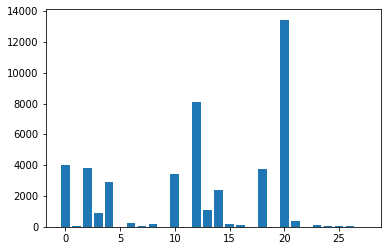

In [103]:
# label encode the target variable
y = LabelEncoder().fit_transform(y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

Class=20, n=13447 (3.571%)
Class=10, n=13447 (3.571%)
Class=4, n=13447 (3.571%)
Class=18, n=13447 (3.571%)
Class=14, n=13447 (3.571%)
Class=0, n=13447 (3.571%)
Class=12, n=13447 (3.571%)
Class=2, n=13447 (3.571%)
Class=3, n=13447 (3.571%)
Class=16, n=13447 (3.571%)
Class=8, n=13447 (3.571%)
Class=13, n=13447 (3.571%)
Class=23, n=13447 (3.571%)
Class=6, n=13447 (3.571%)
Class=24, n=13447 (3.571%)
Class=15, n=13447 (3.571%)
Class=5, n=13447 (3.571%)
Class=7, n=13447 (3.571%)
Class=1, n=13447 (3.571%)
Class=26, n=13447 (3.571%)
Class=25, n=13447 (3.571%)
Class=27, n=13447 (3.571%)
Class=17, n=13447 (3.571%)
Class=9, n=13447 (3.571%)
Class=21, n=13447 (3.571%)
Class=19, n=13447 (3.571%)
Class=22, n=13447 (3.571%)
Class=11, n=13447 (3.571%)


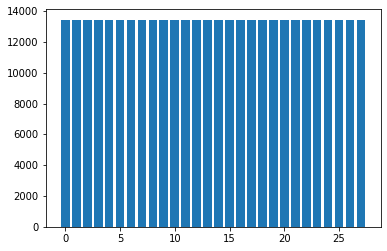

In [104]:
oversample = SMOTE(k_neighbors=2)
X, y = oversample.fit_resample(x, y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

In [105]:
np.unique(y)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27])

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100, stratify=y)
rf_model = RandomForestClassifier()
rf_model.fit(X_train,y_train)
rf_training_accuracy = accuracy_score(y_train,rf_model.predict(X_train))
print(rf_training_accuracy)
rf_testing_accuracy = accuracy_score(y_test,rf_model.predict(X_test))
print(rf_testing_accuracy)

0.9961190125227415
0.8190401572293636


In [107]:
X_test.head()

temperature  pressure  wind_speed
371032     0.196198  0.456626    0.017506
141055     0.294057  0.477845    0.116279
162518     0.543285  0.532730    0.152765
214341     0.277015  0.627119    0.118028
62458      0.184797  0.627119    0.055078

In [108]:
rf_bestparams_model = RandomForestClassifier(n_estimators= 12,
 min_samples_split=5,
 min_samples_leaf= 1,
 max_features= 'sqrt',
 max_depth= 70,
 bootstrap= False,random_state=42)

In [109]:
rf_bestparams_model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=False, max_depth=70, max_features='sqrt',
                       min_samples_split=5, n_estimators=12, random_state=42)

In [110]:
rf_local_weather_model = open("rf_bestparams_weather_model.pkl","wb")
pickle.dump(rf_bestparams_model,rf_local_weather_model)
rf_local_weather_model.close()

In [111]:
accuracy_best_params_training = accuracy_score(y_train,rf_bestparams_model.predict(X_train))
accuracy_best_params_testing = accuracy_score(y_test,rf_bestparams_model.predict(X_test))

In [112]:
print("Training accuracy",accuracy_best_params_training)
print("Testing accuracy",accuracy_best_params_testing)

Training accuracy 0.9661467670610733
Testing accuracy 0.819730691596728


In [113]:
weather_data = pd.read_csv(retail_pov_files[3])
weather_data.head()

Geography    State                 Date  Temperature  Pressure  \
0        US  Arizona  24-02-2022 12:02:00         22.3    1015.0   
1        US  Arizona  25-02-2022 12:02:00         21.6    1015.0   
2        US  Arizona  26-02-2022 12:02:00         22.1    1017.0   
3        US  Arizona  27-02-2022 12:02:00         22.5    1018.0   
4        US  Arizona  28-02-2022 12:02:00         21.7    1018.0   

         Showers  Wind Speed  
0           Mist         4.7  
1           Mist         5.0  
2         Cloudy         6.1  
3  Partly cloudy         5.4  
4  Partly cloudy         5.4

In [114]:
weather_data.shape

(22, 7)

In [115]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Geography    22 non-null     object 
 1   State        22 non-null     object 
 2   Date         22 non-null     object 
 3   Temperature  22 non-null     float64
 4   Pressure     22 non-null     float64
 5   Showers      22 non-null     object 
 6   Wind Speed   22 non-null     float64
dtypes: float64(3), object(4)
memory usage: 1.3+ KB


In [116]:
country = "US"
state = "Arizona"

In [117]:
local_weather_df = weather_data.loc[(weather_data["Geography"]== country) & (weather_data["State"] == state )]

In [118]:
# local_weather_df   

In [119]:
local_weather_df.columns

Index(['Geography', 'State', 'Date', 'Temperature', 'Pressure', 'Showers',
       'Wind Speed'],
      dtype='object')

In [120]:
#temperature	pressure	wind_speed

In [121]:
weather_test_df = pd.DataFrame()

In [122]:
weather_test_df["temperature"] = local_weather_df["Temperature"]
weather_test_df["pressure"] = local_weather_df["Pressure"]
weather_test_df["wind_speed"] = local_weather_df["Wind Speed"]

In [123]:
weather_test_df.head()

temperature  pressure  wind_speed
0         22.3    1015.0         4.7
1         21.6    1015.0         5.0
2         22.1    1017.0         6.1
3         22.5    1018.0         5.4
4         21.7    1018.0         5.4

In [124]:
rf_bestparams_model.predict(weather_test_df)

array([20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20,
       20, 20, 20, 20, 20])

In [125]:
test_df = pd.DataFrame({"temperature":[22.3],"pressure":[1015.0],"wind_speed":[4.7]})
rf_bestparams_model.predict(test_df)

array([20])

In [126]:
localweatherdataapi = pd.DataFrame()

In [127]:
localweatherdataapi["product_id"] = demand_df["product_id"]
localweatherdataapi["base_price"] = demand_df["base_price$"]
localweatherdataapi["current_selling_price"] = demand_df["current_selling_price$"]
localweatherdataapi["predicted_price"] = demand_df["predicted_price$"]
localweatherdataapi["current_profit_margin"] = demand_df["current_profit_margin$"]
localweatherdataapi["Units_Sold"] = demand_df["Units_Sold"]

In [128]:
localweatherdataapi["weather"] = np.random.randint(28, size=len(localweatherdataapi))

In [129]:
x = localweatherdataapi.drop(["predicted_price","product_id",], axis =1)
y = localweatherdataapi["predicted_price"]


xtrain, xtest, ytrain, ytest = train_test_split(x, y,test_size=0.2,random_state=42)
localweatherapi_model = DecisionTreeRegressor()
localweatherapi_model.fit(xtrain, ytrain)
coefficient_of_dermination = r2_score(ytest,localweatherapi_model.predict(xtest))
print(coefficient_of_dermination)
pickle.dump(localweatherapi_model, open('localweather_api_model.pkl','wb'))

0.973310791423079


In [130]:
xtest.head()

base_price  current_selling_price  current_profit_margin  Units_Sold  \
2776   50.551278              75.449669              24.898391          13   
3023   38.340539              61.839579              23.499040           6   
2606  100.960885             120.191530              19.230645          15   
912    69.989230              98.576380              28.587150           3   
877    48.919948              67.944372              19.024424          15   

      weather  
2776       14  
3023        2  
2606        8  
912        13  
877        15

In [131]:
# Scaling

In [132]:
# q25, q75 = percentile(local_weather_df["Temperature"], 25), percentile(local_weather_df["Temperature"], 75)
# iqr = q75 - q25
# print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))
# # calculate the outlier cutoff
# cut_off = iqr * 1.5
# lower, upper = q25 - cut_off, q75 + cut_off
# # identify outliers
# outliers = [x for x in local_weather_df["Temperature"] if x < lower or x > upper]
# print('Identified outliers: %d' % len(outliers))

In [133]:
# Handling outliers

In [134]:
# ''' Detection '''
# # IQR
# Q1 = np.percentile(local_weather_df["Temperature"], 25,
#                    interpolation = 'midpoint')
 
# Q3 = np.percentile(local_weather_df["Temperature"], 75,
#                    interpolation = 'midpoint')
# IQR = Q3 - Q1
 
# print("Old Shape: ", local_weather_df.shape)
 
# # Upper bound
# upper = np.where(local_weather_df["Temperature"] >= (Q3+1.5*IQR))
# # Lower bound
# lower = np.where(local_weather_df["Temperature"] <= (Q1-1.5*IQR))
 
# ''' Removing the Outliers '''
# local_weather_df.drop(upper[0], inplace = True)
# local_weather_df.drop(lower[0], inplace = True)
# print("New Shape: ", local_weather_df.shape)

In [135]:
# z_scores = stats.zscore(outlier_df)
# # calculate z-scores of `df`

# abs_z_scores = np.abs(z_scores)
# filtered_entries = (abs_z_scores < 3).all(axis=1)
# new_df = outlier_df[filtered_entries]

In [136]:
# Scaling

In [137]:
# numeric_cols = ["Temperature","Pressure","Wind Speed"]
# scaler = MinMaxScaler().fit(local_weather_df[numeric_cols])
# local_weather_df.loc[:,numeric_cols]=scaler.transform(local_weather_df.loc[:,numeric_cols])